Lab#3:Linear Regression, MSCS3045, Fall2022.

The objective of this lab is learn about how to make predictions using simple linear regression (SLR) models You can find more information about the data used in this lab here: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download

The kc_house_data dataset contains information on house sale prices in King County, Washington from May 2014 and May 2015. The columns include sale price, number of bedrooms, and square footage of living space. 




In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
df = pd.read_csv("/content/Lab3_kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Write a program using the ols() function that creating a model that takes in the square footage of

living space in a house and gives the price of the house as output. For example, if the input is: 1000, then the output should be: 0 237042.824803 dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model that takes in the square footage of living space in a house and gives the price of the houseis: [237042.82480297]


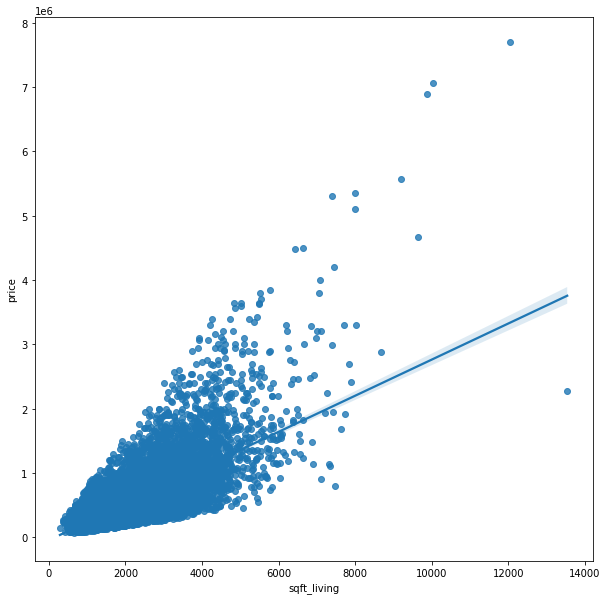

In [24]:
#set the target as Y variable and feature as X variable
X = df['sqft_living']
y = df['price']

#create constant before fitting the model
X = sm.add_constant(X)

#fit the model to the target and feature
model = sm.OLS(y, X).fit()
#Make a prediction, based on the math of OLS

print("Model that takes in the square footage of living space in a house and gives the price of the houseis:",model.predict([1,1000]))

plt.figure(figsize=(10,10))
sns.regplot(x = 'sqft_living', y = 'price', data = df)

plt.show()


Then use the zip code to predict the price.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Predicting the price by using Zip code is: [515972.61449885]


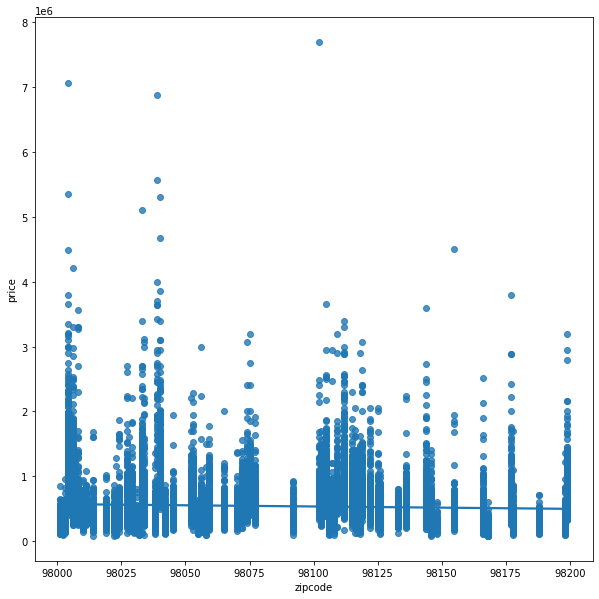

In [26]:
#set the target as Y variable and feature as X variable
X = df['zipcode']
y = df['price']

#create constant before fitting the model
X = sm.add_constant(X)

#fit the model to the target and feature
model = sm.OLS(y, X).fit()
#Make a prediction, based on the math of OLS

print("Predicting the price by using Zip code is:",model.predict([1,98144]))
plt.figure(figsize=(10,10))
sns.regplot(x = 'zipcode', y = 'price', data = df)

plt.show()


Then use the number of bathrooms.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Predicting the price by using bathrooms is: [1262340.89004089]


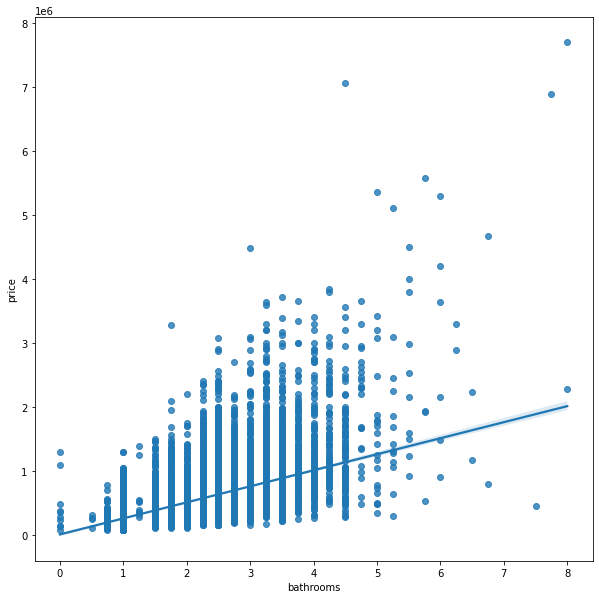

In [25]:
#set the target as Y variable and feature as X variable
X = df['bathrooms']
y = df['price']

#create constant before fitting the model
X = sm.add_constant(X)

#fit the model to the target and feature
model = sm.OLS(y, X).fit()
#Make a prediction, based on the math of OLS
print("Predicting the price by using bathrooms is:", model.predict([1,5]))
plt.figure(figsize=(10,10))
sns.regplot(x = 'bathrooms', y = 'price', data = df)

plt.show()